# 介紹

在前兩節課中，我們學習了如何從密集層的堆棧中構建全連接網絡。首次創建時，網絡的所有權重都是隨機設置的 —— 網絡還“不知道”任何東西。在本課中，我們將了解如何訓練神經網絡；我們將看到神經網絡如何*學習*。

與所有機器學習任務一樣，我們從一組訓練數據開始。訓練數據中的每個範例都由一些特徵（輸入inputs）和預期目標（輸出outputs）組成。訓練網絡意味著調整其權重，使其可以將特徵轉換為目標。例如，在 *80 Cereals* 數據集中，我們想要一個可以獲取每種穀物的`糖`、`纖維`和`蛋白質`含量並對該穀物的`卡路里`進行預測的網絡`。如果我們能夠成功地訓練一個網絡來做到這一點，它的權重必須以某種方式表示這些特徵與訓練數據中表達的目標之間的關係。

除了訓練數據，我們還需要兩件事：
- 衡量網絡預測有多好的“**損失函數(loss function)**”。
- 一個“**優化器(optimizer)**”，可以告訴網絡如何改變其權重。



# 損失函數(The Loss Function)

我們已經了解如何為網絡設計架構，但我們還沒有看到如何告訴網絡要解決*什麼*問題。這是損失函數的工作。

**損失函數衡量目標的真實值與模型預測值之間的差異。**

不同的問題需要不同的損失函數。我們一直在研究 **regression** 問題，其中的任務是預測一些數值 —— *80 Cereals* 中的卡路里，*Red Wine Quality* 中的評級。其他迴歸任務可能是預測房子的價格或汽車的燃油效率。

迴歸問題的常見損失函數是**平均絕對誤差 a.k.a MAE**。對於每個預測“y_pred”，MAE 通過絕對差“abs(y_true - y_pred)”測量與真實目標“y_true”的差異。

數據集上的總 MAE 損失是所有這些絕對差異的平均值。

<figure style="padding: 1em;">
<img src="https://i.imgur.com/VDcvkZN.png" width="500" alt="描繪從數據點到擬合線的誤差線的圖表..">
<figcaption style="textalign: center; font-style: italic"><center>平均絕對誤差是擬合曲線與數據點之間的平均長度。
</center></figcaption>
</figure>

除了 MAE，我們可能會看到迴歸問題的其他損失函數是均方誤差 (MSE) 或 Huber loss（在 Keras 中都可用）。

在訓練期間，模型將**使用損失函數作為找到正確權重值的指南**（損失越**低**越好）。換句話說，損失函數告訴網絡它的目標。

# 優化器 - 隨機梯度下降 #

我們已經描述了我們希望網絡解決的問題，但現在我們需要說*如何*解決它。這是**優化器**的工作。優化器是一種**調整權重以最小化損失的算法**。

實際上，深度學習中使用的所有優化算法都屬於一個稱為**隨機梯度下降**的家族。它們是逐步訓練網絡的迭代算法。訓練的一個**步驟**如下：

1. 採樣一些訓練數據並透過網絡運行以進行預測。
2. 測量預測值和真實值之間的損失。
3. 最後，將權重調整為使損失更小的方向。

然後一遍又一遍地這樣做，直到損失盡可能小（或者直到它不會進一步減少。）

<figure style="padding: 1em;">
<img src="https://i.imgur.com/rFI1tIk.gif" width="1600" alt="逐批擬合一行。損失減少，權重接近真實值。">
<figcaption style="textalign: center; font-style: italic"><center>使用隨機梯度下降訓練神經網絡。
</center></figcaption>
</figure>

每次迭代的訓練數據樣本稱為**minibatch**（或通常只是“batch”），而完整的一輪訓練數據稱為**epoch**。我們訓練的 epoch 數是網絡將看到每個訓練範例的次數。

動畫顯示了第 1 課中的線性模型正在使用 SGD 進行訓練。淡紅點描繪了整個訓練集，而實心紅點是小批量。每次 SGD 看到一個新的小批量時，它都會將權重（`w` 斜率和 `b` y 截距）移向該批次上的正確值。一批接一批，這條線最終會收斂到最合適的位置。我們可以看到，隨著權重越來越接近其真實值，損失變得越來越小。

## 學習率和批量大小(Learning Rate and Batch Size)##

請注意，該線僅在每個批次的方向上進行微小的移動（而不是一直移動）。這些轉變的大小由**學習率**決定。**較小的學習率**意味著網絡需要在其權重收斂到最佳值之前**看到更多的小批量**。

**學習率**和**小批量**的大小是對 SGD 訓練進行方式影響最大的兩個參數。它們的相互作用通常是微妙的，並且這些參數的正確選擇並不總是顯而易見的。 （我們將在練習中探討這些影響。）

幸運的是，對於大多數工作來說，不需要進行廣泛的超參數搜索即可獲得令人滿意的結果。 **Adam** 是一種 SGD 算法，它具有**自適應學習率**，使其適用於大多數問題，無需任何參數調整（從某種意義上說，它是“自我調整”）。 Adam 是一個偉大的通用優化器。

## 添加損失和優化器##

定義模型後，我們可以使用模型的 `compile` 方法添加損失函數和優化器：

```
model.compile(
    optimizer="adam",
    loss="mae",
)
```

請注意，我們可以只用一個字符串來指定損失和優化器。你也可以通過 Keras API 直接訪問這些 —— 例如，如果你想調整參數——但對我們來說，默認值可以正常工作。

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>名字裡有什麼？</strong><br>
<strong>gradient</strong> 是一個向量，它告訴我們權重需要朝哪個方向移動。更準確地說，它告訴我們<em>如何改變權重以使損失變化最快</em>。我們稱我們的過程梯度為<strong>descent</strong>，因為它使用梯度<em>下降</em>損失曲線向最小值。 <strong>Stochastic</strong> 的意思是“由偶然決定的”。我們的訓練是<em>隨機的</em>，因為小批量是來自數據集的<em>隨機樣本</em>。這就是為什麼它被稱為SGD！
</blockquote>

# 範例 - 紅酒品質 #

現在我們知道了開始訓練深度學習模型所需的一切。 所以讓我們看看它的實際效果！ 我們將使用 *Red Wine Quality* 數據集。

該數據集包含來自約 1600 種葡萄牙紅酒的物理化學測量值。 還包括盲品測試對每種葡萄酒的質量評級。 從這些測量中，我們能在多大程度上預測葡萄酒的感知質量？

我們已將所有數據準備工作放入下一個隱藏單元格中。 這對於接下來的內容並不重要，因此請隨意跳過它。 不過，我們現在可能要注意的一件事是，我們已將每個特徵重新調整為位於 $[0, 1]$ 區間內。 正如我們將在第 5 課中討論的那樣，神經網絡往往在其輸入**處於共同尺度**時表現最佳。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/content/drive/MyDrive/red-wine.csv')

# 切分訓練集與測試集
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# 縮放至[0,1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# 拆分特徵與目標
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


這個網絡應該有多少輸入？ 我們可以通過查看數據矩陣中的列數來發現這一點。 確保不要在此處包含目標（`質量`）——僅包含輸入特徵。

In [ ]:
print(X_train.shape)

(1119, 11)


十一列，表示十一個輸入。

我們選擇了一個包含 1500 多個神經元的三層網絡。 該網絡應該能夠學習數據中相當複雜的關係。

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

確定模型的架構應該是過程的一部分。 從簡單開始，使用驗證損失作為指導。 我們將在練習中了解有關模型開發的更多信息。

定義模型後，我們編譯優化器和損失函數。

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

現在我們準備開始訓練了！ 我們已經告訴 Keras 一次向優化器提供 256 行訓練數據（`batch_size`），並在整個數據集（`epochs`）中一直這樣做 10 次。

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 73ms/step - loss: 0.3029 - val_loss: 0.1350
Epoch 2/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1497 - val_loss: 0.1364
Epoch 3/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1285 - val_loss: 0.1287
Epoch 4/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1197 - val_loss: 0.1245
Epoch 5/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1119 - val_loss: 0.1092
Epoch 6/10
5/5 [==============================] - 0s 33ms/step - loss: 0.1108 - val_loss: 0.1168
Epoch 7/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1123 - val_loss: 0.1039
Epoch 8/10
5/5 [==============================] - 0s 36ms/step - loss: 0.1071 - val_loss: 0.1078
Epoch 9/10
5/5 [==============================] - 0s 34ms/step - loss: 0.1064 - val_loss: 0.1017
Epoch 10/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1028 - val_loss: 0.1053


我們可以看到 Keras 會在模型訓練時讓我們了解loss的最新信息。

通常，查看損失的更好方法是繪製它。 `fit` 方法實際上在`History` 對像中記錄了訓練期間產生的loss。 我們將數據轉換為 Pandas 數據框，這使得繪圖變得容易。

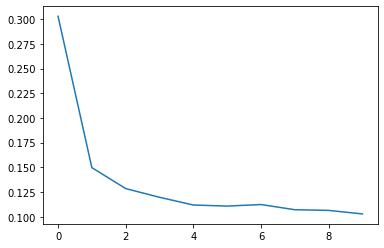

In [ ]:
import pandas as pd

# 將訓練的history轉換成dataframe
history_df = pd.DataFrame(history.history)
# 畫出來
history_df['loss'].plot();

請注意隨著迭代次數，損失如何趨於平穩。 當損失曲線變成這樣水平時，這意味著模型已經學會了它所能學到的一切，沒有理由繼續額外的 epoch。

# EXERCISE

現在，[**使用隨機梯度下降**](https://www.kaggle.com/kernels/fork/11887330) 來訓練你的網絡。